In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import glob 
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
df_solana=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Solana.csv")


In [3]:
df_solana.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.0
1,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.0
2,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.0
3,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.0
4,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.0


In [4]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_solana['Date'] = pd.to_datetime(df_solana['Date'])

df_merged = pd.merge(df_bitcoin, df_solana, on='Date', suffixes=('_btc', '_SOL'))
btc_precio = df_merged['High_btc']
sol_precio = df_merged['High_SOL']

corr, _ = pearsonr(btc_precio, sol_precio)
print(f"Coeficiente  entre BTC y SOL: {corr}")

Coeficiente  entre BTC y SOL: 0.7166531578396375


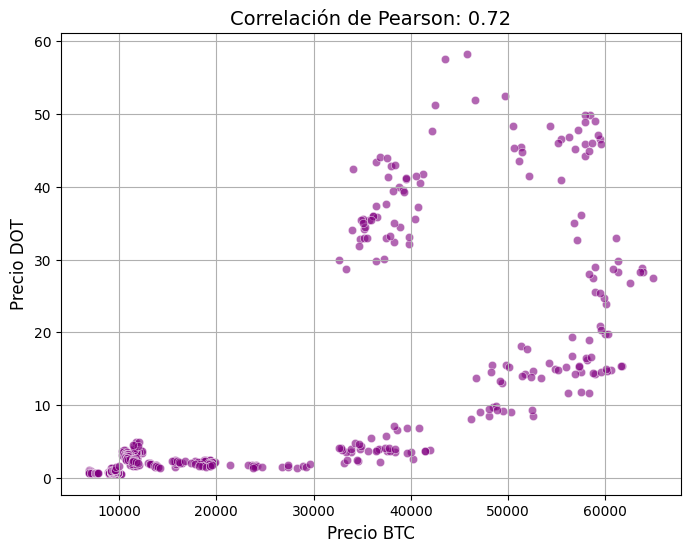

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=btc_precio, y=sol_precio, color='purple', alpha=0.6)
plt.title(f'Correlación de Pearson: {corr:.2f}', fontsize=14)
plt.xlabel('Precio BTC', fontsize=12)
plt.ylabel('Precio DOT', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_solana['Date'] = pd.to_datetime(df_solana['Date'])

start_date = '2020-04-11 23:59:59'
df_btc_filtered = df_bitcoin[df_bitcoin['Date'] >= start_date]
df_sol_filtered = df_solana[df_solana['Date'] >= start_date]

df_merged = pd.merge(df_bitcoin, df_solana, on='Date', suffixes=('_btc', '_sol'))
df_merged['btc_change'] = df_merged['Close_btc'].diff()
df_merged['sol_change'] = df_merged['Close_sol'].diff()

btc_up_dates = df_merged[df_merged['btc_change'] > 0]['Date']
sol_up_dates = df_merged[df_merged['sol_change'] > 0]['Date']

time_diffs = []
for btc_date in btc_up_dates:
    nearest_sol_date = sol_up_dates.iloc[(sol_up_dates - btc_date).abs().argmin()]
    time_diff = abs((nearest_sol_date - btc_date).days)
    time_diffs.append({'BTC Date': btc_date, 'SOL Date': nearest_sol_date, 'Tiempo de diferencia (dias)': time_diff})

time_diffs_df = pd.DataFrame(time_diffs)
print(time_diffs_df)

               BTC Date            SOL Date  Tiempo de diferencia (dias)
0   2020-04-12 23:59:59 2020-04-12 23:59:59                            0
1   2020-04-16 23:59:59 2020-04-16 23:59:59                            0
2   2020-04-18 23:59:59 2020-04-18 23:59:59                            0
3   2020-04-22 23:59:59 2020-04-22 23:59:59                            0
4   2020-04-23 23:59:59 2020-04-22 23:59:59                            1
..                  ...                 ...                          ...
246 2021-06-29 23:59:59 2021-06-29 23:59:59                            0
247 2021-07-02 23:59:59 2021-07-02 23:59:59                            0
248 2021-07-03 23:59:59 2021-07-03 23:59:59                            0
249 2021-07-04 23:59:59 2021-07-03 23:59:59                            1
250 2021-07-06 23:59:59 2021-07-06 23:59:59                            0

[251 rows x 3 columns]
